## Solving the Wave Equation (correctly this time!)

Applying two subsequent substitutions to the FTCS scheme, $h\to-h$ and $t\to t+h$, we get the implicit scheme:
$$ 
\begin{align}
\phi(x,t+h) - h\psi(x,t+h) =& \phi(x,t) \\
\psi(x,t+h) - h\frac{v^2}{a^2} [\phi(x+a,t+h) + \phi(x-a,t+h) - 2\phi(x,t+h)] =& \psi(x,t)
\end{align}
$$
This is not an explicit method, but can solved by means of linear algebra, such as Gaussian elimination. This method is **unconditionally stable**. However, it also over-compensates. Just as the solutions obtained from FTCS method grow unconditionally, these solutions decay unconditionally. We want a stable wave described by the wave equation.  

The Crank-Nicolson method takes the average of the implicit and the FTCS schemes, making it both stable and constant (neither grows nor decays).
$$ 
\begin{align}
\phi(x,t+h) - \frac{1}{2}h\psi(x,t+h) =& \phi(x,t) + \frac{1}{2} h\psi(x,t) \\
\psi(x,t+h) - h\frac{v^2}{2a^2} [\phi(x+a,t+h) +& \phi(x-a,t+h) -2\phi(x,t+h)] \\
=& \psi(x,t) + h\frac{v^2}{2a^2} [\phi(x+a,t)+\phi(x-a,t) - 2\phi(x,t)]
\end{align}
$$
This is more complicated, but can also be solved as simultaneous linear equations.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 0.01      # m, length of the string
V = 1e-1      # m/s
N = 100       # Number of divisions in x-grid
Nt = 1000     # Number of divisions in t-grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000

x  = np.arange(0,L,a)
t  = np.arange(0,h*Nt+epsilon,h)

### Discretizing the domain

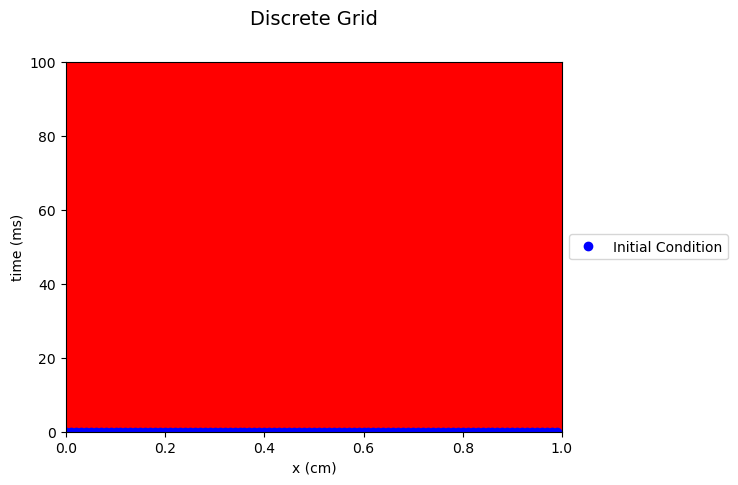

In [26]:
X, T = np.meshgrid(x*100, t/1e-3)  # distance converted to cm and time to ms

fig = plt.figure()
plt.plot(X,T,'ro')
plt.plot(X[0],0*X[0],'bo',label='Initial Condition')
plt.xlim(0,L*100)
plt.ylim(0,t[-1]/1e-3)
plt.xlabel('x (cm)')
plt.ylabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid',fontsize=14,y=1.08)
plt.show()

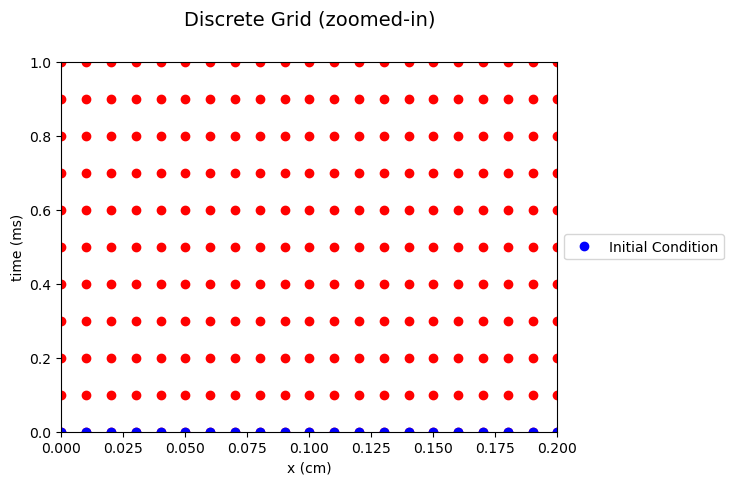

In [29]:
fig = plt.figure()
plt.plot(X,T,'ro')
plt.plot(X[0],0*X[0],'bo',label='Initial Condition')
plt.xlim(0,0.2)
plt.ylim(0,1)
plt.xlabel('x (cm)')
plt.ylabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid (zoomed-in)',fontsize=14,y=1.08)
plt.show()

### Initial Condition

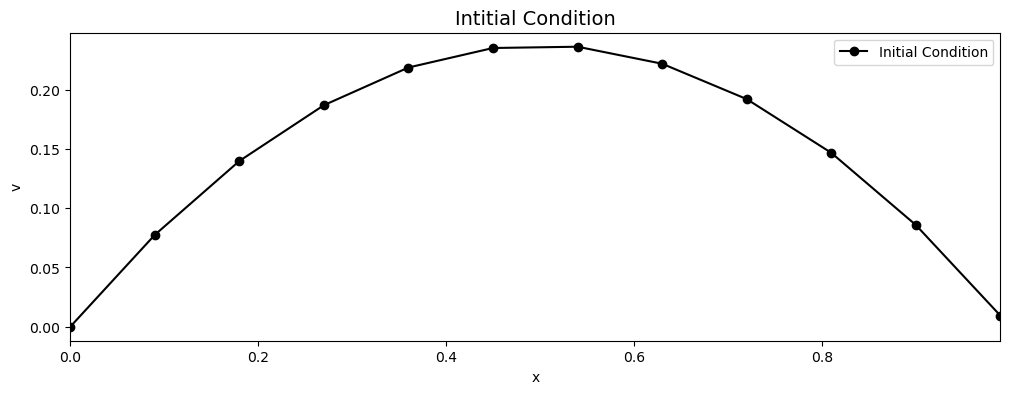

In [31]:
# parameters for the Gaussian function
C = 1.0       # velocity of the hammer strike in ms^-1 
d = 0.1       # Hammer distance from 0 to point of impact with string
sigma = 0.3   # sigma value in meters 

# a simple gaussian function for the initial condition of the string
def y0(x): 
    return (C*x*(L-x)/(L**2))*np.exp((-(x-d)**2)/(2*sigma**2)) 

fig = plt.figure(figsize=(12,4))
plt.plot(x[::9]*100,y0(x)[::9],'ko-',label='Initial Condition')  # plotting every 10 points
plt.xlim(x[0]*100,x[-1]*100)
plt.title('Intitial Condition',fontsize=14)
plt.xlabel('x (cm)')
plt.ylabel('v')
plt.legend(loc='best')
plt.show()

### Boundary conditions

In [ ]:
# Creation of empty array(s)
y  = np.empty(N+1)
yp = np.empty(N+1)
v  = np.empty(N+1)
vp = np.empty(N+1)

C  = V*h/a
C2 = C**2              # Help variable in the scheme

# boundary conditions
ys, ye = 0.0, 0.0     # Beginning and end height - fixed point 
vs, ve = 0.0, 0.0     # Beginning and end velocity 

y[0], y[-1] = ys, ye
y[1:N] = np.zeros(N-1)
yp[0], yp[-1] = ys, ye
v[0], v[-1] = vs, ve
v[1:N] = y0(x)[1:N]
vp[0], vp[-1] = vs, ve

# times when we wish to plot the temperature profile
t20  = 20e-3    # string at 20ms 
t70  = 70e-3    # string at 70ms
t100 = 100e-3   # string at 100ms
tend = t100 + epsilon

You can find the full Crank-Nicolson algorithm here: [https://georg.io/2013/12/03/Crank_Nicolson](https://georg.io/2013/12/03/Crank_Nicolson)